In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import scipy.optimize as opt
import random

%matplotlib inline

#### FCI - MACKENZIE - CC
Jose Eduardo - TIA - 41720504 <br>
Gregory Fernandes - TIA - 41706692<br>
Matheus Gois - TIA - 41746491<br>

### QUESTÃO 1<br>
Podemos esperar que alguns neurônios tenham respostas mais fortes
a qualquer dos estímulos e que outros tenham respostas consistentemente fracas.
Haveria, então, uma forte relação entre resposta ao som puro e resposta ao chamado.
A partir do diagrama de dispersão de resposta ao chamado de macaco
contra resposta ao som puro na Figura 1, qual seria a correlação r
que você estimaria?<br>
(a) –0,6<br>
(b) –0,1<br>
(c) 0,1<br>
<b>(d) 0,6<b><br>

In [4]:
chamaMacacos = pd.read_excel('CHAMAMACACOS.xls')
tabela = pd.DataFrame(chamaMacacos)
x = tabela["Tom"]
y = tabela["Chamados"]
print(stats.pearsonr(x,y)[0])

print(len(x))


0.6385623562988246
37


### QUESTÃO 2<br>
• Qual das seguintes afirmativas sobre o diagrama de dispersão no Figura 1
é correta?<br>
(a) Há evidência moderada de que a resposta ao som puro
cause resposta ao chamado de macaco.<br>
(b) Há evidência moderada de que a resposta ao chamado de macaco
cause resposta ao som puro.<br>
(c) Há um ou dois valores atípicos e pelo menos um deles pode ser influente.<br>
(d) Nenhuma das afirmativas anteriores.<br>

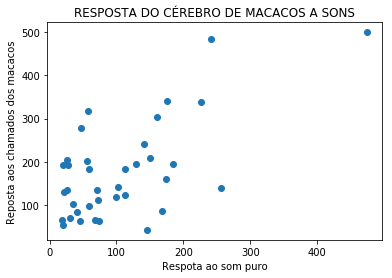

In [54]:
plt.scatter(x = tabela["Tom"],y = tabela["Chamados"])
plt.title("RESPOSTA DO CÉREBRO DE MACACOS A SONS")
plt.xlabel("Respota ao som puro")
plt.ylabel("Reposta aos chamados dos macacos")

plt.show()

### QUESTÃO 3<br>
(a) Ache a reta de mínimos quadrados para a predição da resposta
do neurônio ao chamado com base na resposta do neurônio ao som puro.<br>
Acrescente essa reta ao seu diagrama.<br>
Marque em seu diagrama o ponto (chame-o de A) com o maior resíduo
(positivo ou negativo) e, também,
o ponto (chame-o de B) que é um valor atípico na direção x.<br>


#### MODELO DE RETA(LINEAR)

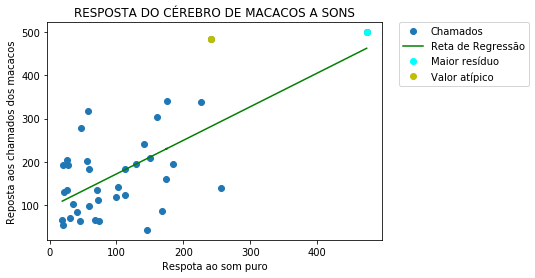

In [57]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)


plt.plot(x, y, 'o')
plt.plot(x, intercept + slope*x,"g",label='Reta de Regressão')
plt.plot(x[0], y[0],"o",label='Maior resíduo',color="aqua")
plt.plot(x[2], y[2],"yo",label='Valor atípico')


plt.title("RESPOSTA DO CÉREBRO DE MACACOS A SONS")
plt.xlabel("Respota ao som puro")
plt.ylabel("Reposta aos chamados dos macacos")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [56]:
#Função da reta
def f(x, a0,a1):
    return a1*x+a0

p = (len(x))

sigma = []
for i in range(p):
    sigma.append(1)
    
param, cov = opt.curve_fit (f, x, y, sigma=sigma)

0      1380.318547
1     24077.874728
2     41414.100072
3      4648.452546
4      1927.976568
5      4948.707718
6     12121.190720
7     19509.677113
8      7017.629832
9         7.113034
10    27150.917735
11     1394.124907
12        0.103688
13     3465.518621
14        0.827515
15     1043.740805
16     2889.095710
17     8012.687348
18     1440.729803
19      230.390273
20     6698.376374
21     1777.583654
22     1835.145646
23    32298.584244
24     4031.793212
25    22052.669492
26     4586.032695
27     1749.630221
28      329.733853
29     2308.344869
30     5820.128299
31     7893.688851
32      434.573814
33      351.116613
34     6974.995798
35     3078.425399
36     1823.736272
dtype: float64


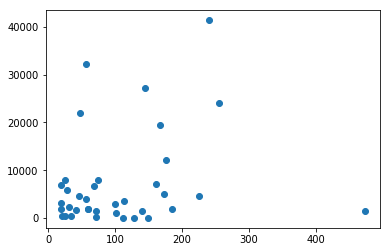

41414.10007208868


In [55]:
# Cálculo dos resíduos
res = (y-f(x,param[0],param[1]))**2
print(res)
plt.plot(x,res,"o")
plt.show()

#O maior resto
print(res.max())

(b) Quão influente é cada um desses pontos para o coeficiente de correlação r ?<br>


(c) Quão influente é cada um desses pontos para a reta de regressão?<br>